# Fingerprint para calculo de toxicidade ===> indice ToxCast

## **Analise com PCA e com t-SNE**

In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 46.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import sklearn
import rdkit

## planilha com os SMILES e indice de toxicidade "ToxCast_final4.csv"

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

# Get the actual filename from the uploaded dictionary keys
filename = list(uploaded.keys())[0]  # Assuming only one file is uploaded

# Use the correct filename to read the CSV
data = pd.read_csv(io.BytesIO(uploaded[filename]), sep=";", decimal=",", header=0, encoding='latin1')

Saving ToxCast_final4.csv to ToxCast_final4.csv


In [ ]:
data

,SMILES,ToxCast
0,OCCOC(=O)C1=CC=CC=C1O,3
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31
2,CC(CC1=CC=CC=C1)NCCCCl,0
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35
...,...,...
8740,CCCCCCCCNC,0
8741,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16
8742,OC(=O)C1=CC=CC(Cl)=C1Cl,0
8743,ClCC=CCl,0


**Representação de Moléculas**

 podemos adicionar uma coluna ao DataFrame contendo as representações moleculares correspondentes aos SMILES.

 usando método `AddMoleculeColumnToFrame` da biblioteca PandasTools

In [ ]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(frame=data, smilesCol='SMILES')
#data    <== visualiza as moleculas

data.head()

[18:11:43] WARNING: not removing hydrogen atom without neighbors
[18:11:43] WARNING: not removing hydrogen atom without neighbors


,SMILES,ToxCast,ROMol
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d90>
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7ce81a1119a0>
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d20>
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e00>
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e70>


# Calculo do peso molecular

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def featurize_molecule(mol):
    return {
        'MolWt': Descriptors.MolWt(mol)

    }

def featurize_dataframe(data):
    feats = [featurize_molecule(m) for m in data['ROMol']]
    feats_df = pd.DataFrame(feats)
    return pd.concat([data.reset_index(drop=True), feats_df], axis=1)

data = featurize_dataframe(data)
data.head()

,SMILES,ToxCast,ROMol,MolWt
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d90>,182.175
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7ce81a1119a0>,312.453
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d20>,211.736
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e00>,423.901
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e70>,409.782


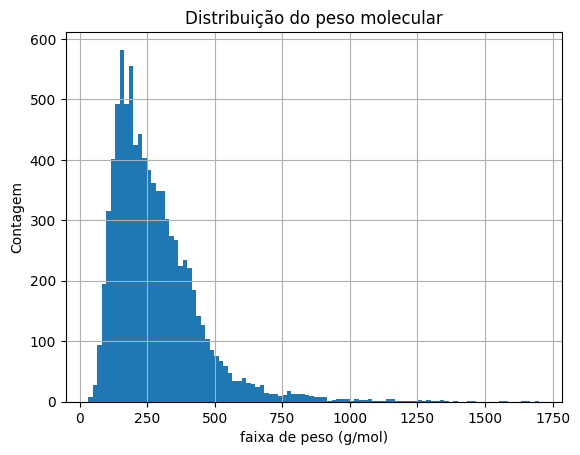

In [ ]:
data['MolWt'].hist(bins=100)
plt.title('Distribuição do peso molecular')
plt.ylabel('Contagem')
plt.xlabel('faixa de peso (g/mol)')
plt.show()

`data2` tem compostos com peso molecular menor que 750 g/mol

In [ ]:
data2 = data[data['MolWt'] <= 750].reset_index(drop=True)
data2

,SMILES,ToxCast,ROMol,MolWt
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d90>,182.175
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7ce81a1119a0>,312.453
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d20>,211.736
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e00>,423.901
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e70>,409.782
...,...,...,...,...
8553,CCCCCCCCNC,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81ac33840>,143.274
8554,CCC1=CC(=C(O)C(=C1)C(C)(C)C)C(C)(C)C,16,<rdkit.Chem.rdchem.Mol object at 0x7ce81ac338b0>,234.383
8555,OC(=O)C1=CC=CC(Cl)=C1Cl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81ac33920>,191.013
8556,ClCC=CCl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81ac33990>,110.971


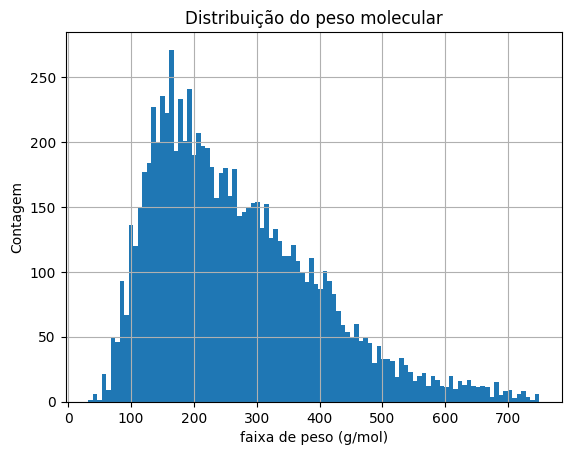

In [ ]:
data2['MolWt'].hist(bins=100)
plt.title('Distribuição do peso molecular')
plt.ylabel('Contagem')
plt.xlabel('faixa de peso (g/mol)')
plt.show()

### Morgan fingerprint

In [ ]:
from rdkit.Chem import AllChem, rdFingerprintGenerator

def morgan_fp(mol):
    morgan = AllChem.GetMorganGenerator(radius=2, fpSize=2048)  # <== numero de elementos
    return morgan.GetFingerprint(mol)

data['morgan'] = data['ROMol'].apply(morgan_fp)
data.head()

,SMILES,ToxCast,ROMol,morgan
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7f6086ee8e40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7f6086ee89e0>,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7f6086ee8dd0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7f6086ee8eb0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7f6086ee8f20>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# **MACCS Fingerprints**

In [ ]:
from rdkit.Chem import MACCSkeys

def maccs_fp(mol):
   return MACCSkeys.GenMACCSKeys(mol)

data2['maccs'] = data2['ROMol'].apply(maccs_fp)
data2.head()

,SMILES,ToxCast,ROMol,MolWt,maccs
0,OCCOC(=O)C1=CC=CC=C1O,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d90>,182.175,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,C\C=C1\C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...,31,<rdkit.Chem.rdchem.Mol object at 0x7ce81a1119a0>,312.453,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC(CC1=CC=CC=C1)NCCCCl,0,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111d20>,211.736,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Cl.COC1=CC2=NC(=NC(N)=C2C=C1OC)N1CCN(CC1)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e00>,423.901,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ClC1CC2C(C1Cl)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,35,<rdkit.Chem.rdchem.Mol object at 0x7ce81a111e70>,409.782,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
len(data2['maccs'].iloc[0])  # numero de elementos do vetor

167

Transformando as colunas fingerprint em uma matriz X de entrada para os modelos

In [ ]:
import numpy as np

# Convert 'morgan' column to NumPy array with fixed length
X = data2['maccs'].apply(lambda x: np.pad(np.frombuffer(x.ToBinary(), dtype=np.uint8), (0, 167 - len(np.frombuffer(x.ToBinary(), dtype=np.uint8))), 'constant'))

# Convert to a NumPy array before feeding to the model
X = np.stack(X.values)

print(X.shape)  # Verify the shape of the array

(8558, 167)


In [ ]:
# PCA Reduction
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X)

In [ ]:
# Explained variance ratio in %
print("Explained Variance Ratio (in %):", (pca.explained_variance_ratio_ * 100))

Explained Variance Ratio (in %): [49.94543653 16.75489114  8.35768391  6.74525875  3.98807697  2.69742782
  2.05315135  1.52826784  1.09998057  0.9121025 ]


In [ ]:
np.cumsum(pca.explained_variance_ratio_) # Variancia acumulada em %

array([0.49945437, 0.66700328, 0.75058012, 0.8180327 , 0.85791347,
       0.88488775, 0.90541926, 0.92070194, 0.93170175, 0.94082277])

Text(0, 0.5, 'PC2')

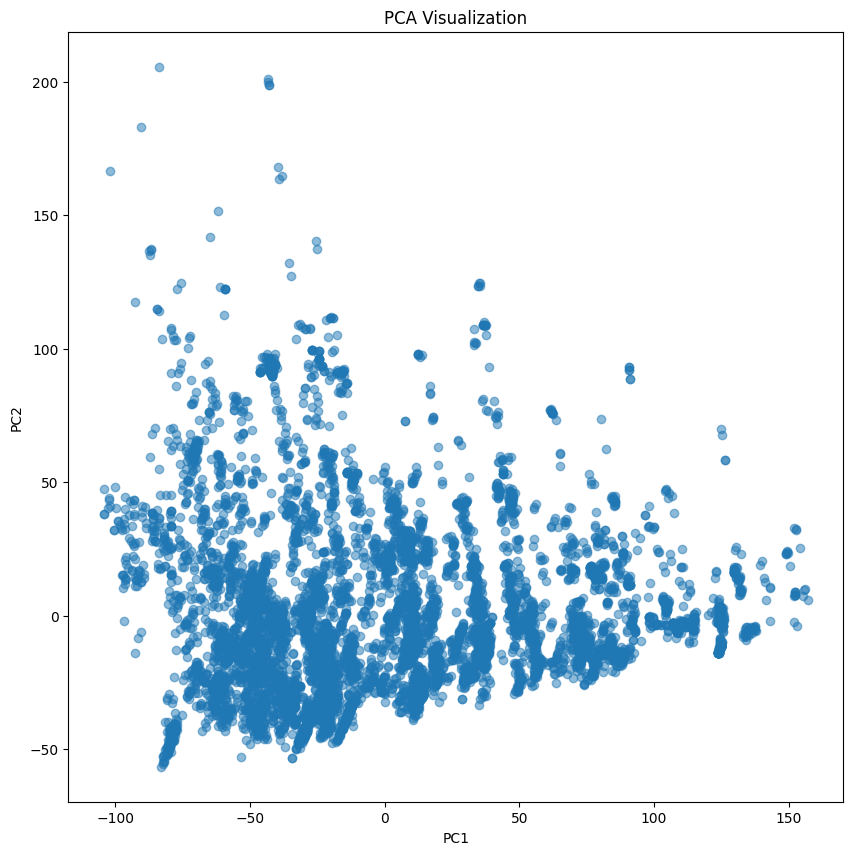

In [ ]:
# Plot PCA
plt.figure(figsize=(10,10))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title("PCA Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")

# **Destacando ['ToxCast'] = zero**

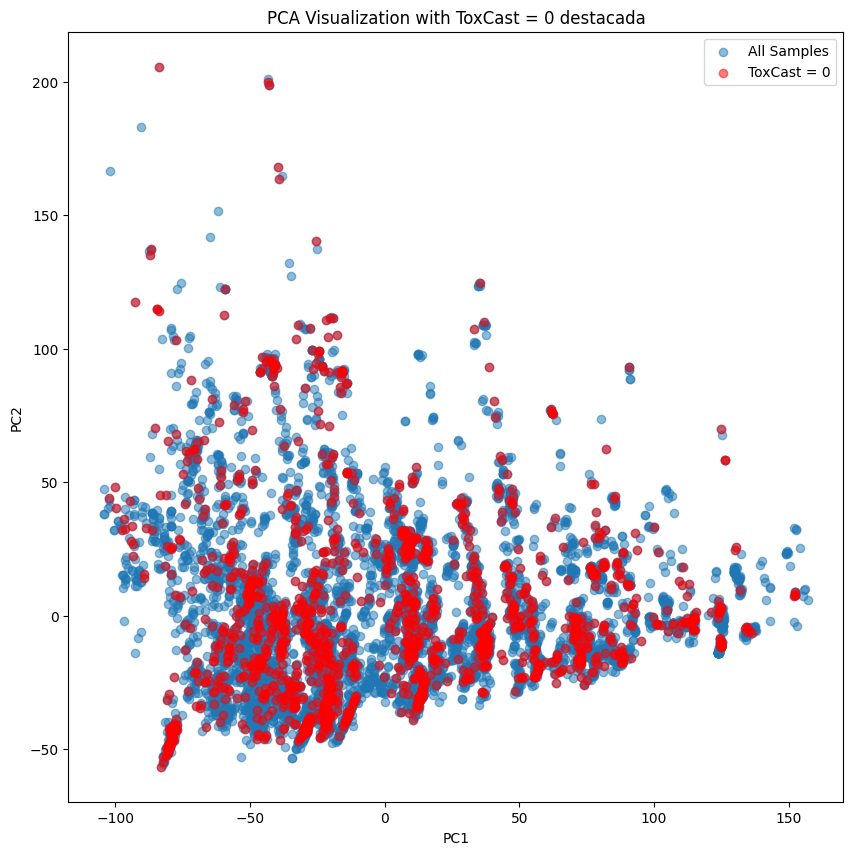

In [ ]:

# Get indices of samples where data2['ToxCast'] is zero
zero_indices = data2[data2['ToxCast'] == 0].index

# Plot PCA results, highlighting samples with ToxCast = 0
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, label='All Samples')  # Plot all samples
plt.scatter(pca_result[zero_indices, 0], pca_result[zero_indices, 1], color='red', alpha=0.5, label='ToxCast = 0')  # Highlight ToxCast = 0 samples
plt.title("PCA Visualization with ToxCast = 0 destacada")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Faixa de valores de **ToxCast** a escolha do usuario:

Enter the minimum ToxCast value: 50
Enter the maximum ToxCast value: 70


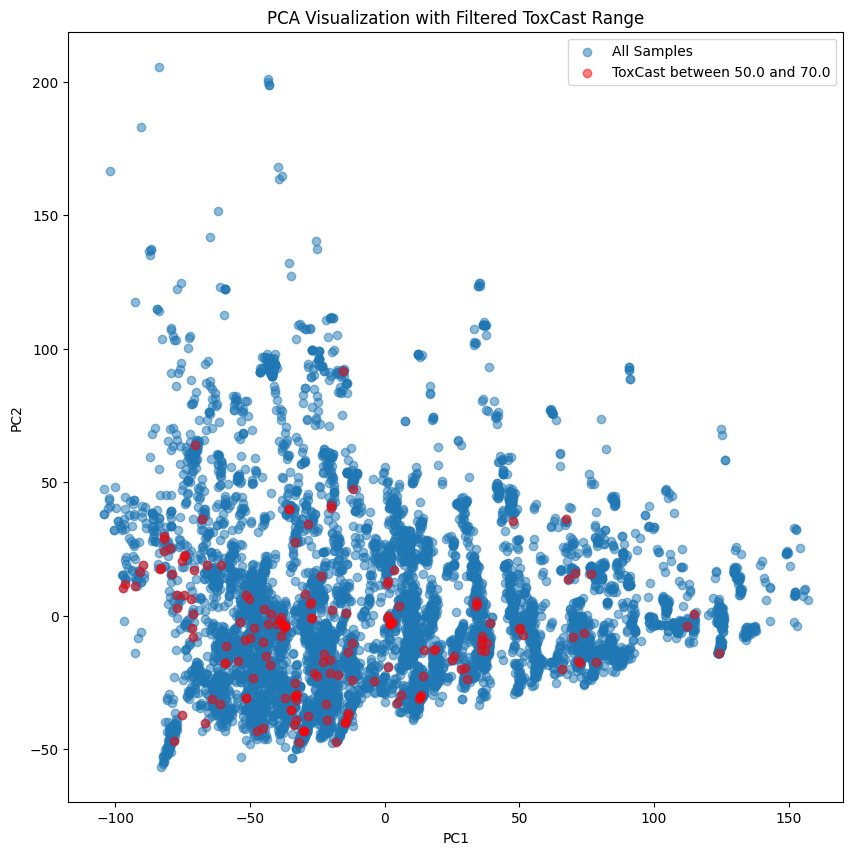

In [ ]:

# Get user input for the range of ToxCast values
min_toxcast = float(input("Enter the minimum ToxCast value: "))
max_toxcast = float(input("Enter the maximum ToxCast value: "))

# Filter data2 based on the specified range
filtered_data = data2[(data2['ToxCast'] >= min_toxcast) & (data2['ToxCast'] <= max_toxcast)]

# Get indices of the filtered data in the original data2
filtered_indices = filtered_data.index

# Plot PCA results, highlighting the filtered data
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, label='All Samples')  # Plot all samples
plt.scatter(pca_result[filtered_indices, 0], pca_result[filtered_indices, 1], color='red', alpha=0.5, label=f'ToxCast between {min_toxcast} and {max_toxcast}')  # Highlight filtered samples
plt.title("PCA Visualization with Filtered ToxCast Range")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [ ]:
# t-SNE Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

Text(0, 0.5, 't-SNE2')

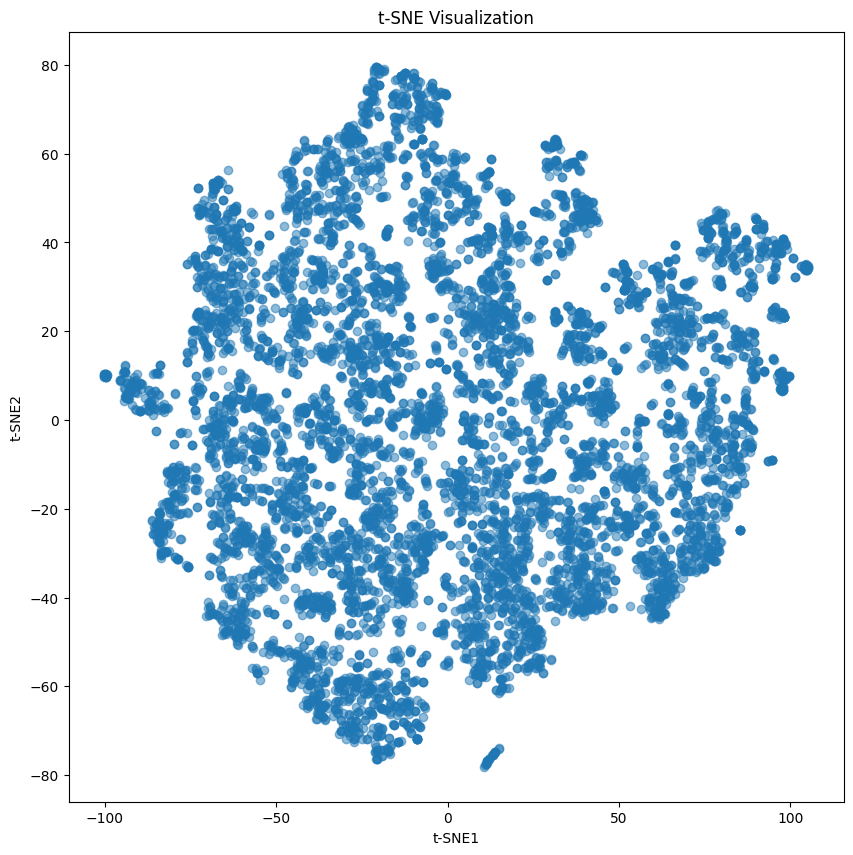

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_result[:,0], tsne_result[:,1], alpha=0.5)
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")